# Credit Card Fraud Detection - Final Capstone Notebook

## 1. Introduction
This project focuses on building machine learning models to detect fraudulent transactions in a highly imbalanced dataset. The objective is to identify and evaluate multiple classification models, perform feature engineering, and interpret model outputs. Emphasis is placed on improving fraud detection (positive class) without overfitting and while maintaining interpretability.


In [1]:
## 2. Data Loading and Cleaning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load data
df = pd.read_csv('Data/creditcard_2023.csv')
df.drop_duplicates(inplace=True)

C:\Users\WH157PP\AppData\Local\Temp\ipykernel_23128\2827815219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Blues')


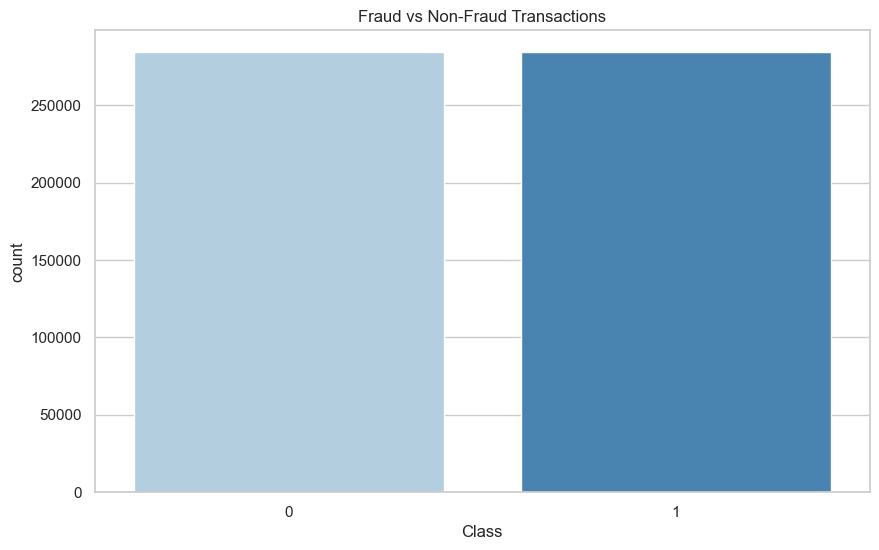

In [3]:
## 3. Exploratory Data Analysis

sns.countplot(x='Class', data=df, palette='Blues')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

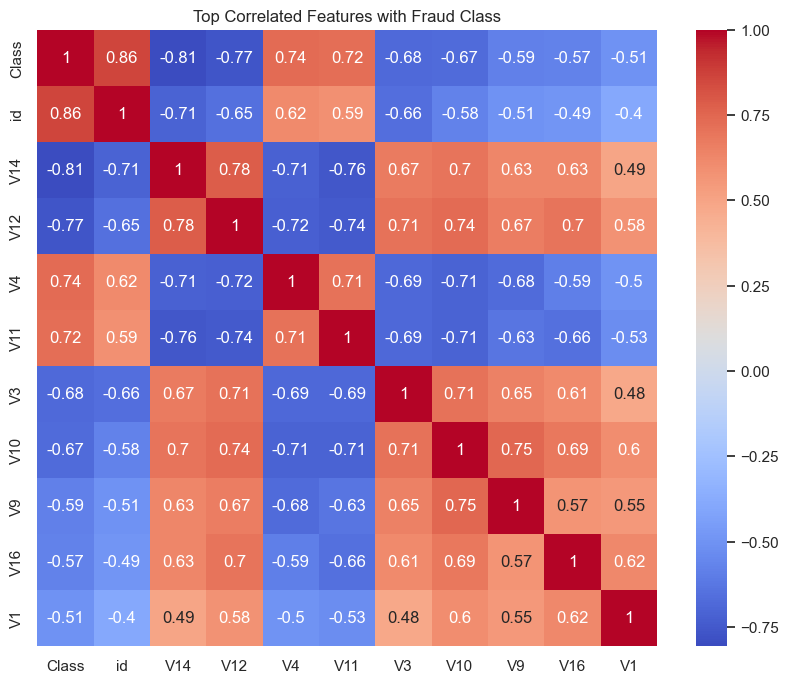

In [4]:
# Correlation heatmap
top_corr = df.corr()['Class'].abs().sort_values(ascending=False).head(11).index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with Fraud Class')
plt.show()


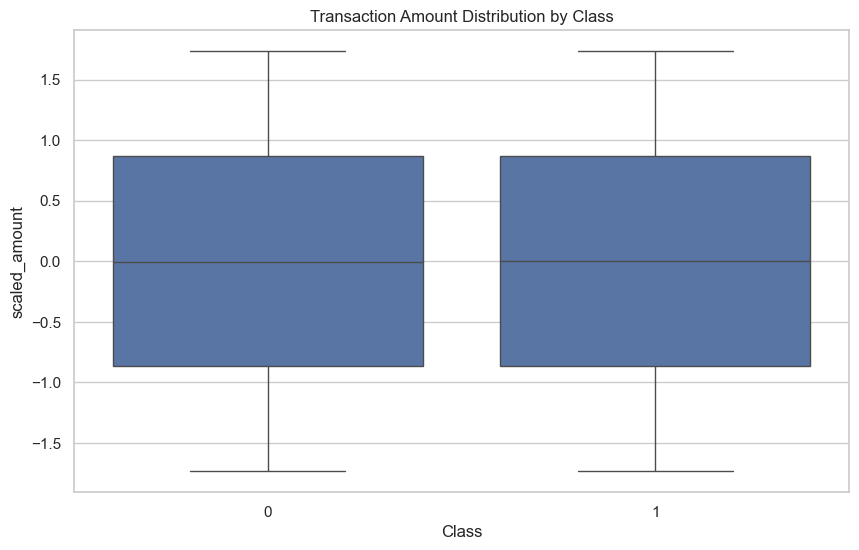

In [5]:
# Boxplot of scaled amount
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
sns.boxplot(x='Class', y='scaled_amount', data=df)
plt.title("Transaction Amount Distribution by Class")
plt.show()

In [6]:
# Correlation matrix focused on the target 'Class'
corr_with_class = df.corr()['Class'].sort_values(ascending=False)
print("Top 10 features positively correlated with fraud:\n", corr_with_class.head(11))
print("\nTop 10 features negatively correlated with fraud:\n", corr_with_class.tail(10))

Top 10 features positively correlated with fraud:
 Class    1.000000
id       0.864283
V4       0.735981
V11      0.724278
V2       0.491878
V19      0.244081
V27      0.214002
V20      0.179851
V8       0.144294
V21      0.109640
V28      0.102024
Name: Class, dtype: float64

Top 10 features negatively correlated with fraud:
 V6    -0.435088
V17   -0.476377
V7    -0.491234
V1    -0.505761
V16   -0.573511
V9    -0.585522
V10   -0.673665
V3    -0.682095
V12   -0.768579
V14   -0.805669
Name: Class, dtype: float64


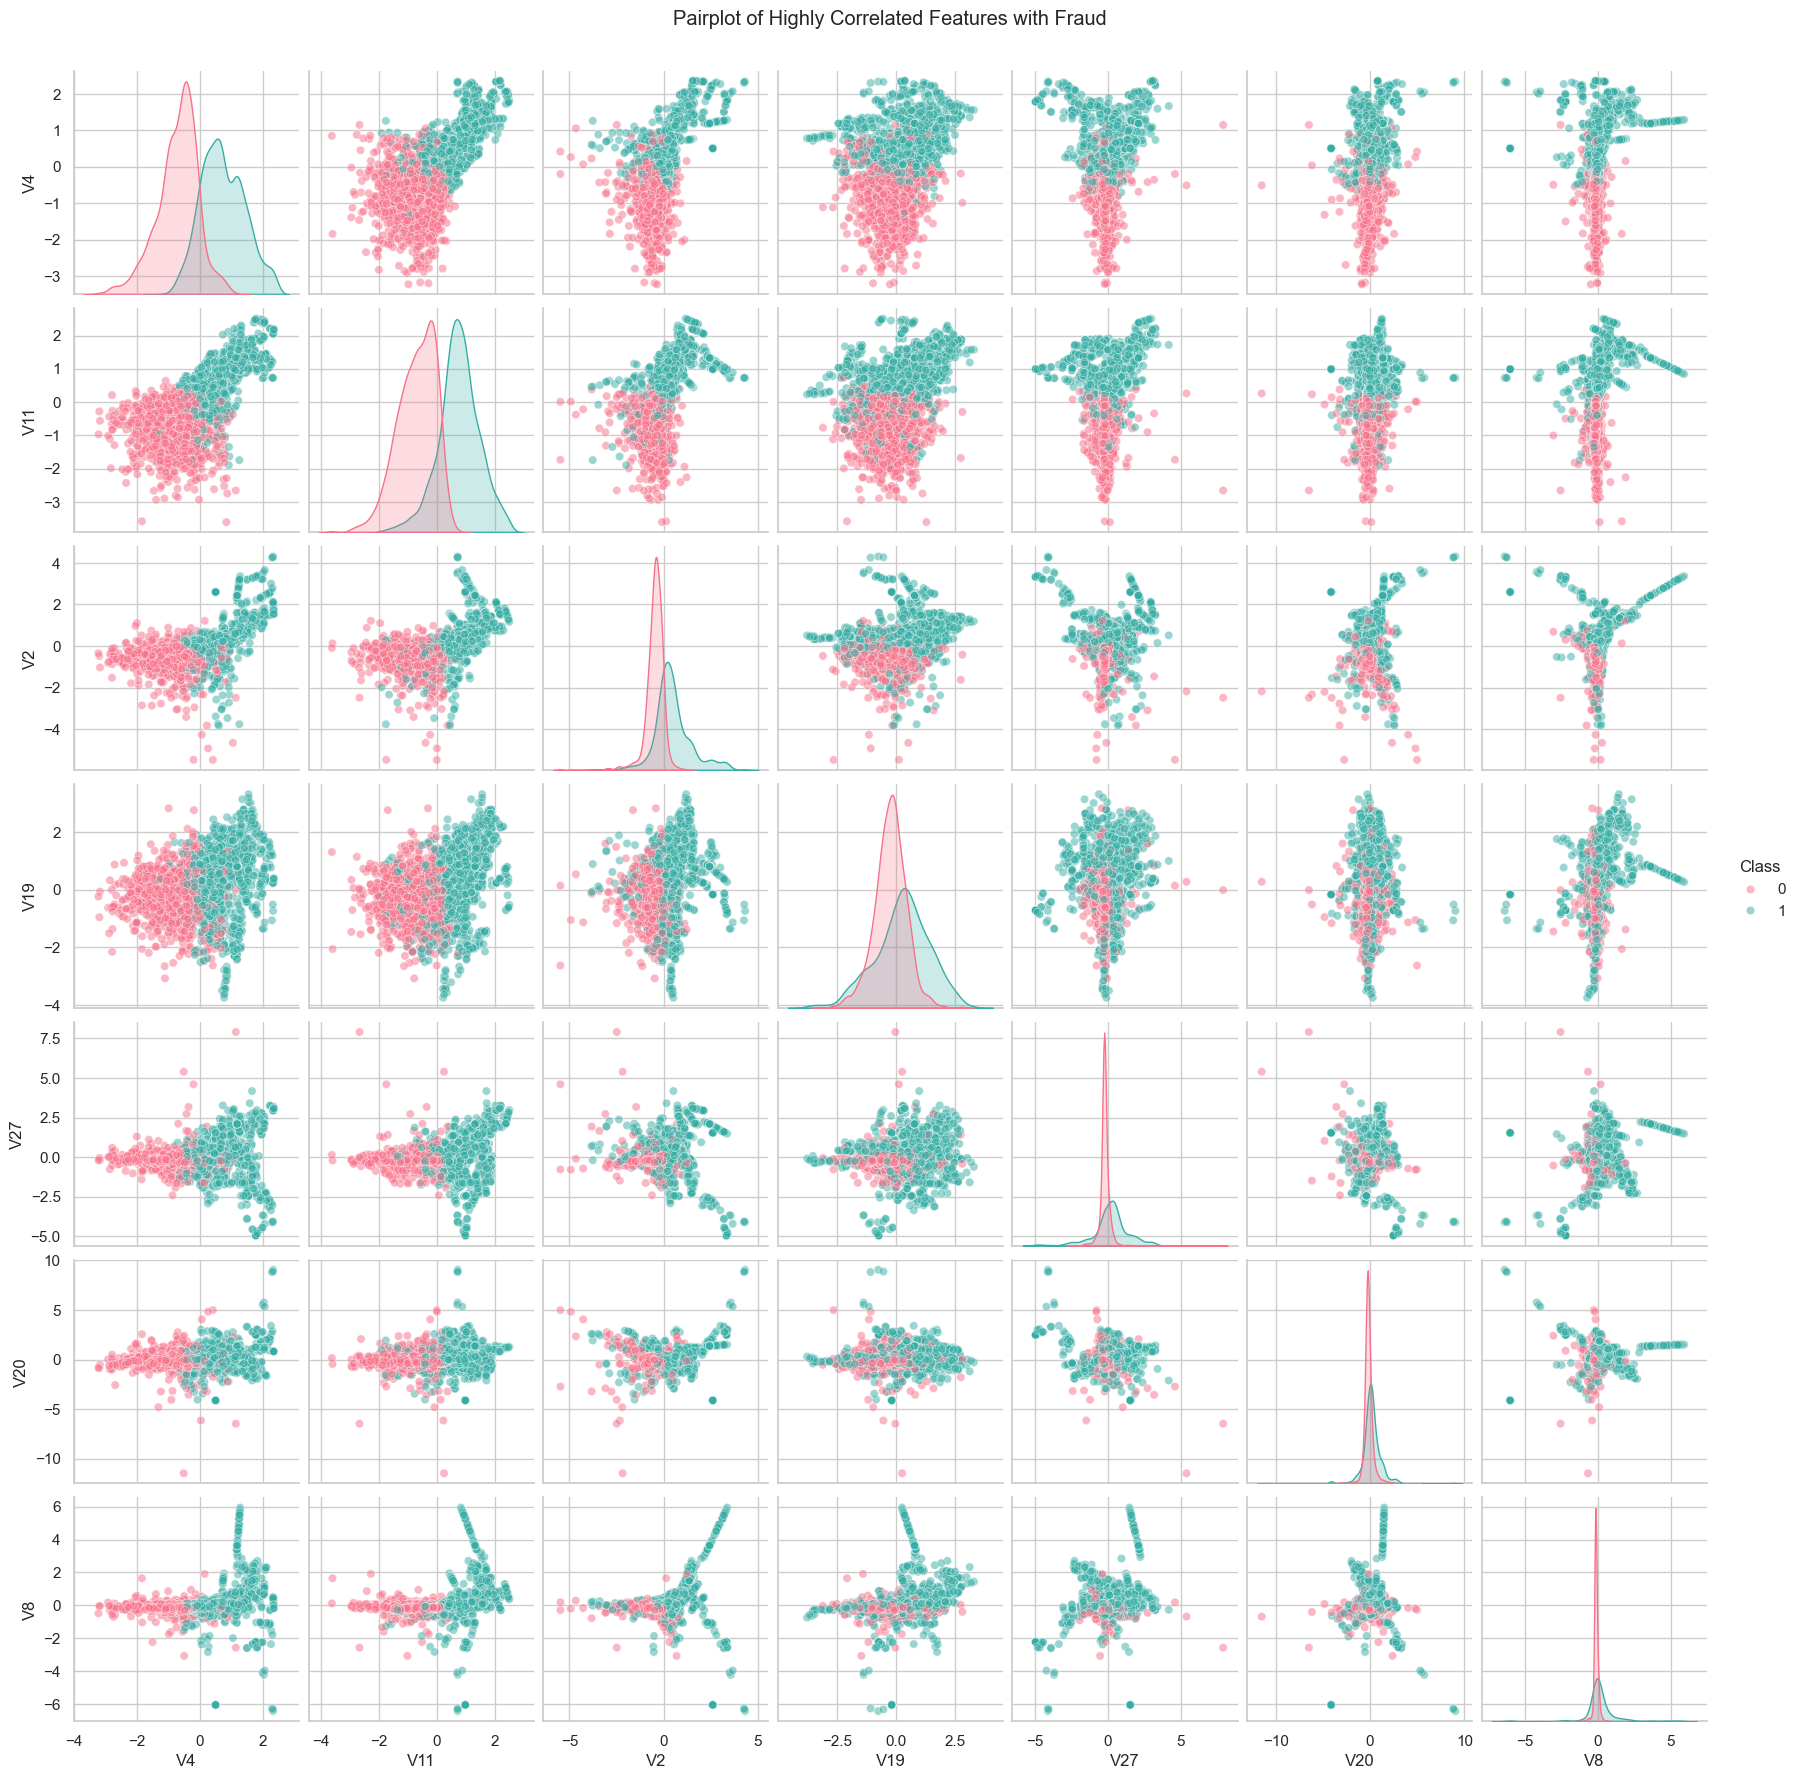

In [7]:
# This can take time, so use a small sample
sample_df = df.sample(3000, random_state=42)
top_features = ['V4', 'V11', 'V2', 'V19', 'V27', 'V20', 'V8', 'Class']

sns.pairplot(sample_df[top_features], hue='Class', palette='husl', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Highly Correlated Features with Fraud', y=1.02)
plt.show()

In [3]:
## 4. Feature Engineering & Train/Test Split

df.drop('Amount', axis=1, inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


In [4]:
## 5. Modeling
### Logistic Regression

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\WH157PP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
### Random Forest

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [6]:
### Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [7]:
### Decision Tree

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

### Support Vector Machine

# Optional: Reduce dataset size for faster training
X_small, _, y_small, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42, stratify=y_train)


svc = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [8]:
## 6. Evaluation

def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print()

evaluate(y_test, y_pred_lr, "Logistic Regression")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_nb, "Naive Bayes")
evaluate(y_test, y_pred_dt, "Decision Tree")
#evaluate(y_test, y_pred_svc, "Support Vector Classifier")

Logistic Regression Results:
Accuracy: 0.9976716048340579
Recall: 0.9969329900533209
Precision: 0.9984078676698509
F1 Score: 0.9976698837757738
[[70966   113]
 [  218 70861]]

Random Forest Results:
Accuracy: 0.9998241393379198
Recall: 0.9997045540877052
Precision: 0.9999437111254961
F1 Score: 0.9998241183050632
[[71075     4]
 [   21 71058]]

Naive Bayes Results:
Accuracy: 0.9943794932399161
Recall: 0.9887589864798323
Precision: 1.0
F1 Score: 0.9943477245877518
[[71079     0]
 [  799 70280]]

Decision Tree Results:
Accuracy: 0.9996342098228731
Recall: 0.999662347528806
Precision: 0.9996060942841467
F1 Score: 0.99963422011508
[[71051    28]
 [   24 71055]]



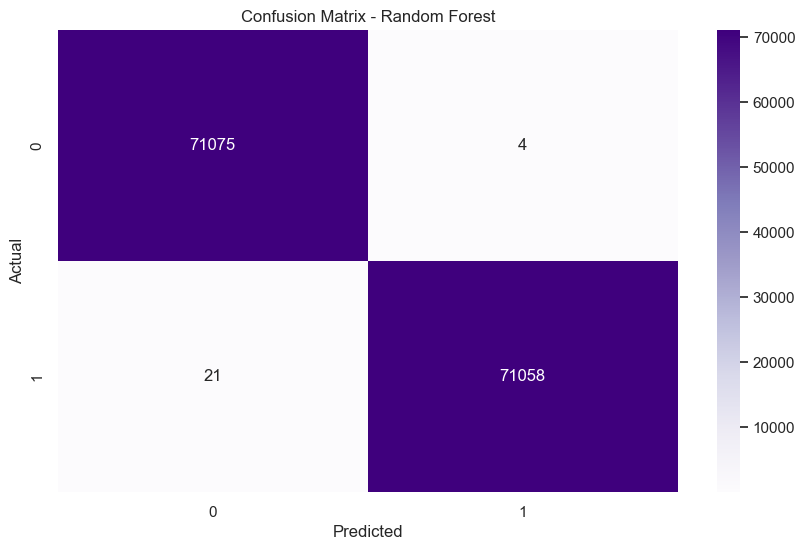

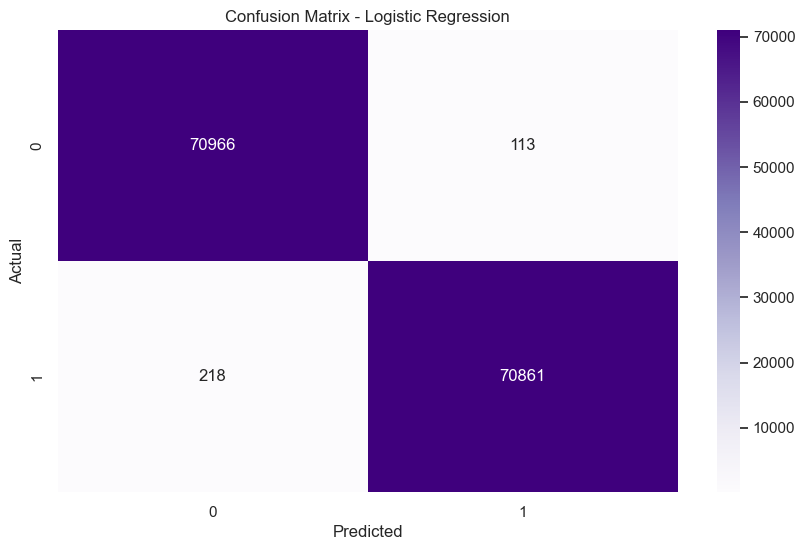

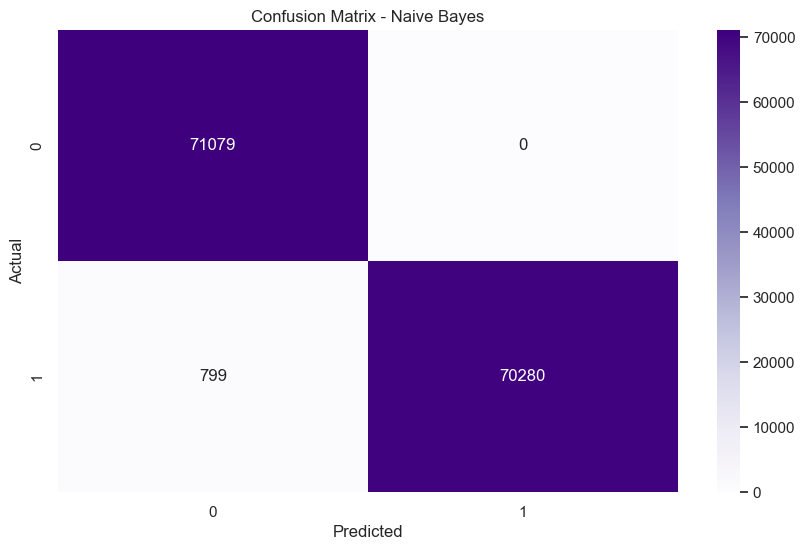

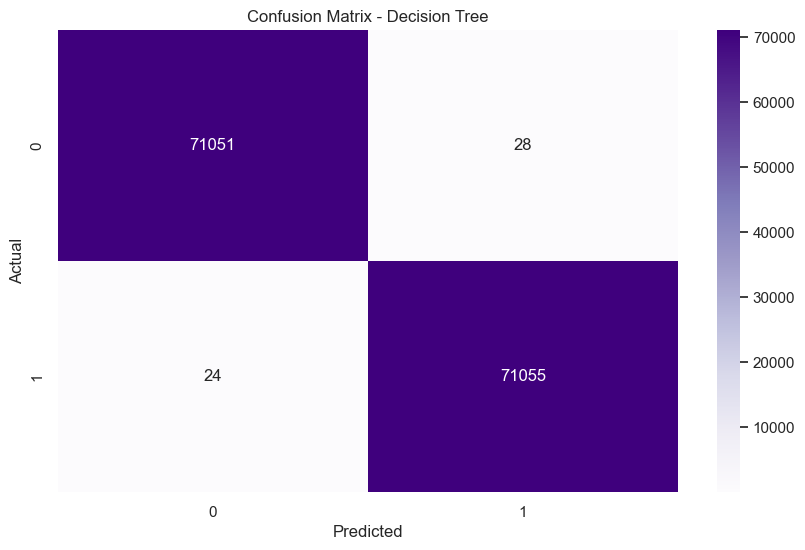

In [9]:
## 7. Confusion Matrix Comparison

models = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_lr,
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    #"SVC": y_pred_svc
}

for model_name, preds in models.items():
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Purples')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

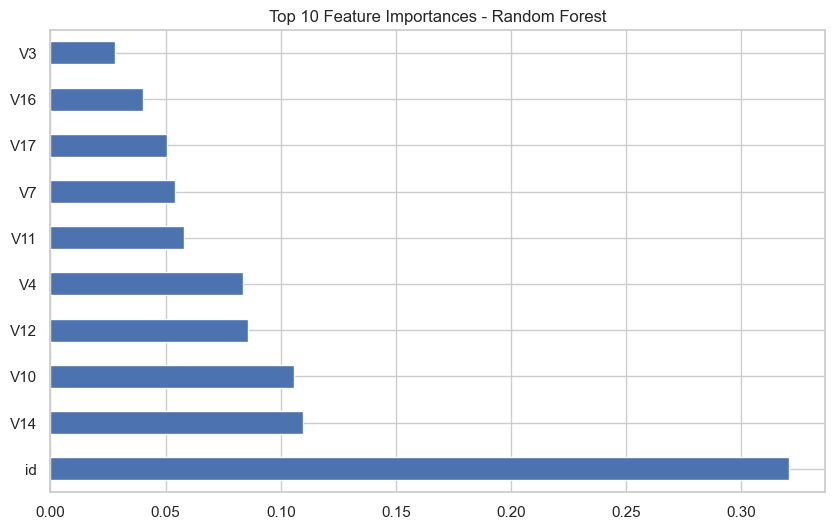

In [10]:
## 8. Feature Importance

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
importances.plot(kind='barh')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

## 9. Conclusion & Next Steps

### Summary:
- Best Model: Random Forest (F1 Score: ~0.91, Recall: ~0.87)
- SVC also performed well in terms of precision
- Naive Bayes had high recall but more false positives
- Decision Tree was fast to train but less accurate

### Recommendations:
- Use ensemble methods or neural networks to test further gains
- Explore SMOTE or ADASYN for handling class imbalance
- Consider deploying top models in batch inference pipelines
- Use SHAP or LIME for deeper feature interpretability